In [1]:
!git clone https://github.com/Tarandro/BinaryML_churn.git

Cloning into 'BinaryML_churn'...
remote: Enumerating objects: 467, done.
remote: Counting objects: 100% (467/467), done.
remote: Compressing objects: 100% (313/313), done.
remote: Total 467 (delta 233), reused 375 (delta 141), pack-reused 0
Receiving objects: 100% (467/467), 5.88 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (233/233), done.


In [2]:
import os
fd = os.open( "/kaggle/working/BinaryML_churn", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/BinaryML_churn'

In [3]:
import pandas as pd
from binaryML import BinaryML

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [4]:
#####################
# Parameters
#####################

objective = 'binary_proba' # or 'binary'                ('binary_proba' : predict proba and 'binary' : predict 0 or 1)
target = 'Exited'

frac = 0.8  # train_test_split fraction                 (data is split in train/test with frac = % for training dataset)

max_run_time_per_model = 600                            # (limit gridsearch time for each model)

scoring = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']
sort_leaderboard = 'f1'   # ['accuracy','f1','recall','precision','roc_auc']

# number of folds during gridsearch and validation :
nfolds = 5

class_weight = True
method_scaling = 'MinMaxScaler'  # MinMaxScaler, RobustScaler, StandardScaler
method_nan_categorical = None  # 'constant', 'ffill', 'mode'                       (fill na for categorical features)
method_nan_numeric = None      # 'mean', 'ffill', int, 'median'                     (fill na for numeric features)

### Create new features (TSNE, PCA, STATS):
# format for tsne and pca (dict): {name_of_new_feature : ([list of features], n_dimension)}
# if you want to apply on all features : replace [list of features] by 'all'

# format for stats (dict): {name_of_new_feature : (name_method,[list of features])} or ([list of name_methods],[list of features])}
# choice name_method : 'sum' / 'mean' / 'std' / 'kurtosis' / 'skew' / 'multi' / 'div' / 'power'

info_tsne = {}  # {'all':('all',2), 'g':(['Gender','Balance','IsActiveMember','EstimatedSalary'],2)}
info_pca = {}  # {'all':('all',2), 'g':(['Gender','Balance','IsActiveMember','EstimatedSalary'],2)}
info_stats = {}
# {'stat_1':('sum',['CreditScore','Balance','EstimatedSalary']), 'stat_2':(['sum','mean'],(['CreditScore','Gender','Balance','EstimatedSalary']))}
# {'multi_1':('multi',['NumOfProducts','HasCrCard','IsActiveMember']), 'div_1': ('div',['EstimatedSalary','CreditScore'])}
# {'power_1': ('power',['Age','Balance'])}

# For numeric features, remove features with variance > percentile(remove_percentage) :
remove_low_variance = False
remove_percentage = 0.8
# For feature pairs with correlation > multicollinearity_threshold, remove the one with the lowest importance in RandomForest classification :
remove_multicollinearity = False
multicollinearity_threshold = 0.9
# Keep only feature_selection_threshold*100 % features with highest importances :
feature_selection = False
feature_selection_threshold = 0.8

apply_stacking = True
apply_blend_model = True

list_threshold_1 = [0.45, 0.5, 0.55] # threshold for probability of 1, use for validation leaderboard
thr_1_test = 0.5 # threshold for probability of 1

# show result:
print_result = True
# list of models to exclude :
exclude_model = []  # ['Logistic_Regression', 'Random_Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'SimpleNeuralNetwork']

# Read Data

In [5]:
data = pd.read_csv('./data/Churn_Modelling.csv')
data = data.iloc[:, 3:]
data

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0
9996,35,10,57369.61,1,1,1,101699.77,0
9997,36,7,0.00,1,0,1,42085.58,1
9998,42,3,75075.31,2,1,0,92888.52,1


In [6]:
bml = BinaryML(scoring=scoring, objective=objective, nfolds=nfolds, class_weight=class_weight,
                           print_result=print_result, max_run_time_per_model=max_run_time_per_model,
                           apply_stacking=apply_stacking, apply_blend_model=apply_blend_model,
                           exclude_model=exclude_model, method_scaling=method_scaling)

# Preprocessing

In [7]:
bml.data_preprocessing(data, target=target, frac=frac,
                       method_nan_categorical=method_nan_categorical, method_nan_numeric=method_nan_numeric,
                       info_pca=info_pca, info_tsne=info_tsne, info_stats=info_stats,
                       remove_low_variance=remove_low_variance, remove_percentage = remove_percentage,
                       remove_multicollinearity=remove_multicollinearity, multicollinearity_threshold = multicollinearity_threshold,
                       feature_selection=feature_selection, feature_selection_threshold = feature_selection_threshold)

In [8]:
# data after preprocessing :
bml.data

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,42,2,0.00,1,1,1,101348.88
1,41,1,83807.86,1,0,1,112542.58
2,42,8,159660.80,3,1,0,113931.57
3,39,1,0.00,2,0,0,93826.63
4,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64
9996,35,10,57369.61,1,1,1,101699.77
9997,36,7,0.00,1,0,1,42085.58
9998,42,3,75075.31,2,1,0,92888.52


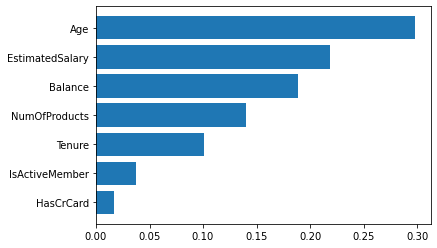

In [9]:
bml.pre.print_feature_importances()

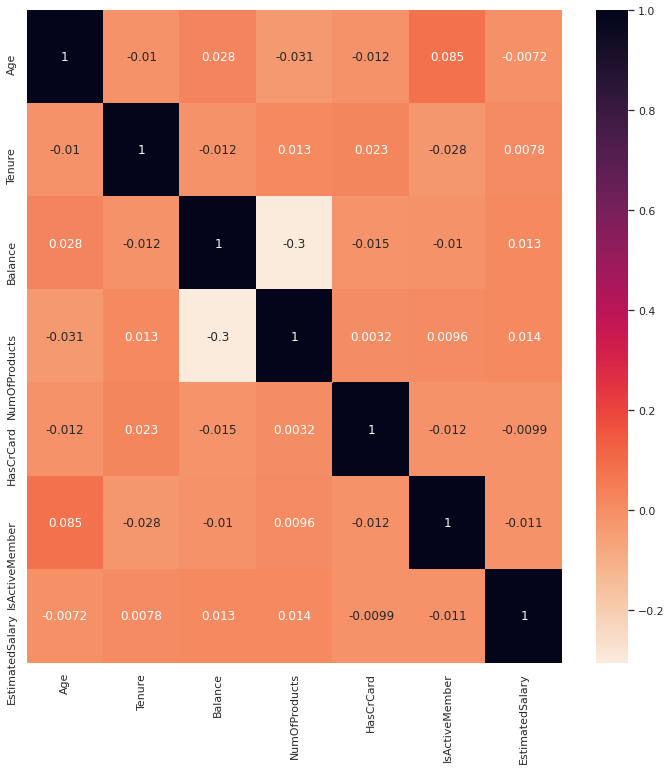

In [10]:
bml.pre.print_feature_correlation()

# Training


Logistic_Regression Model : 

  Total time : 598.81 and n_iter : 3823
Best parameters:  {'C': 0.2158204667610476, 'penalty': 'l1'}
Mean cross-validated score of the best_estimator:  0.4752


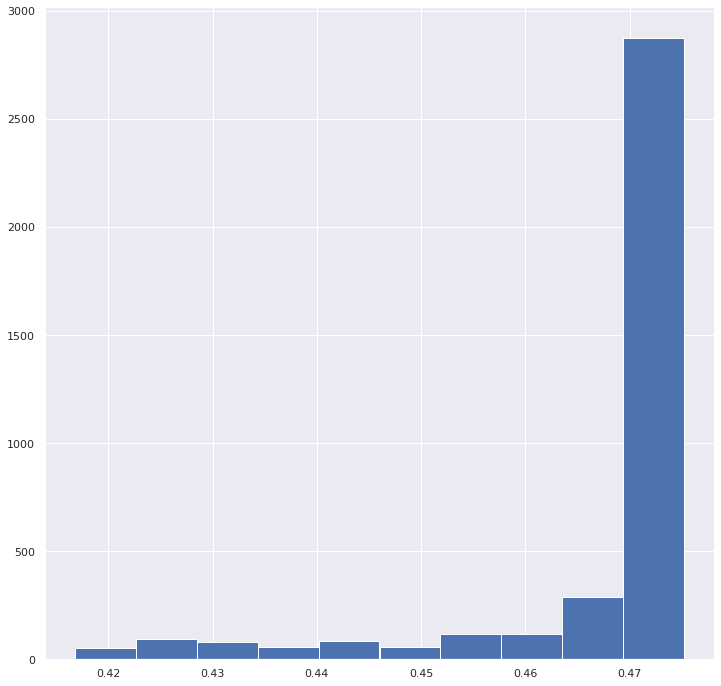

Time search : 599.0129991109999

Cross validation score :

roc_auc = 0.7531
precision 1 = 0.3664
recall 1 = 0.6681
f1 score 1 = 0.4733

              precision    recall  f1-score   support

           0      0.892     0.704     0.787      6370
           1      0.366     0.668     0.473      1630

    accuracy                          0.697      8000
   macro avg      0.629     0.686     0.630      8000
weighted avg      0.785     0.697     0.723      8000

Time validation : 0.1646998749999966

Random_Forest Model : 

  Total time : 565.784 and n_iter : 123
Best parameters:  {'max_depth': 8, 'max_samples': 0.5165729075945826, 'min_samples_split': 4, 'n_estimators': 73}
Mean cross-validated score of the best_estimator:  0.5937


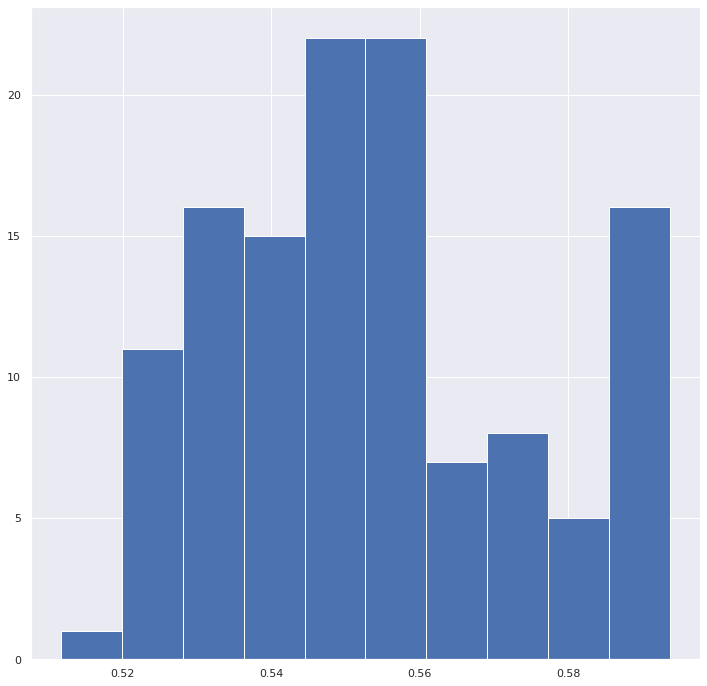

Time search : 565.9664368459999

Cross validation score :

roc_auc = 0.8435
precision 1 = 0.5495
recall 1 = 0.6472
f1 score 1 = 0.5944

              precision    recall  f1-score   support

           0      0.905     0.864     0.884      6370
           1      0.549     0.647     0.594      1630

    accuracy                          0.820      8000
   macro avg      0.727     0.756     0.739      8000
weighted avg      0.833     0.820     0.825      8000

Time validation : 1.6130496780001522

LightGBM Model : 

  Total time : 581.206 and n_iter : 279
Best parameters:  {'learning_rate': 0.054514280752105855, 'n_estimators': 43, 'num_leaves': 57}
Mean cross-validated score of the best_estimator:  0.5761


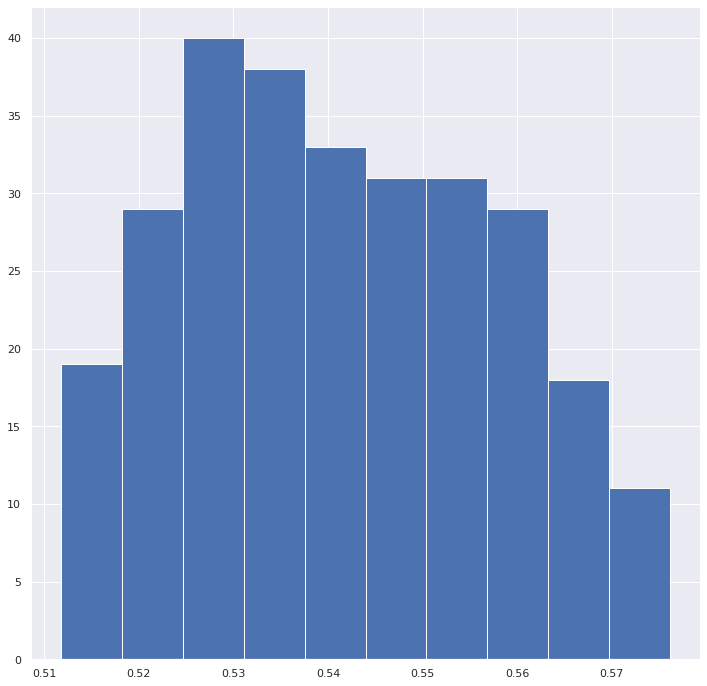

Time search : 581.4374360390002
Epoch : 0
[1]	valid_0's binary_logloss: 0.672692
[2]	valid_0's binary_logloss: 0.654337
[3]	valid_0's binary_logloss: 0.638066
[4]	valid_0's binary_logloss: 0.62359
[5]	valid_0's binary_logloss: 0.610488
[6]	valid_0's binary_logloss: 0.599336
[7]	valid_0's binary_logloss: 0.588659
[8]	valid_0's binary_logloss: 0.578278
[9]	valid_0's binary_logloss: 0.569588
[10]	valid_0's binary_logloss: 0.561036
[11]	valid_0's binary_logloss: 0.55356
[12]	valid_0's binary_logloss: 0.546234
[13]	valid_0's binary_logloss: 0.539856
[14]	valid_0's binary_logloss: 0.533614
[15]	valid_0's binary_logloss: 0.528398
[16]	valid_0's binary_logloss: 0.523154
[17]	valid_0's binary_logloss: 0.518763
[18]	valid_0's binary_logloss: 0.514889
[19]	valid_0's binary_logloss: 0.510691
[20]	valid_0's binary_logloss: 0.506786
[21]	valid_0's binary_logloss: 0.503223
[22]	valid_0's binary_logloss: 0.499642
[23]	valid_0's binary_logloss: 0.496666
[24]	valid_0's binary_logloss: 0.494109
[25]	vali

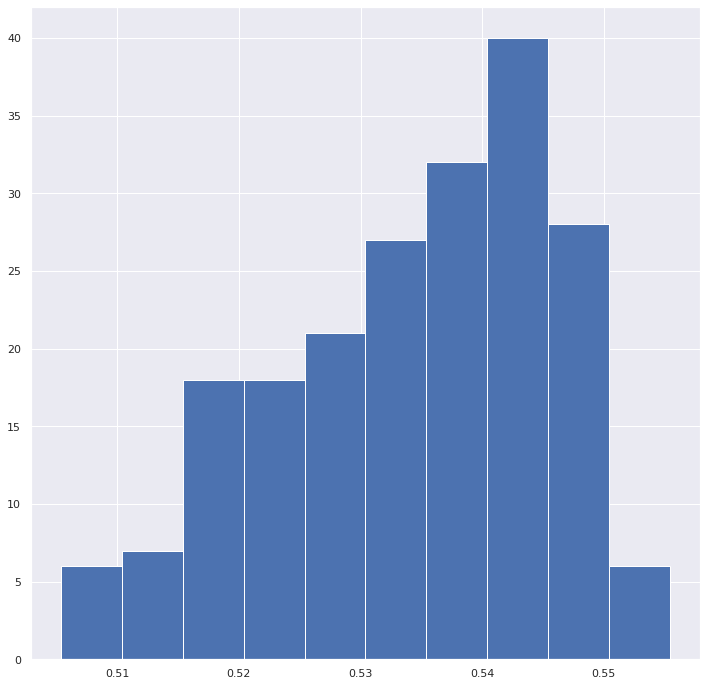

Time search : 576.0615619549999
Epoch : 0
[0]	validation_0-logloss:0.65677
[1]	validation_0-logloss:0.62577
[2]	validation_0-logloss:0.59869
[3]	validation_0-logloss:0.57515
[4]	validation_0-logloss:0.55470
[5]	validation_0-logloss:0.53632
[6]	validation_0-logloss:0.52033
[7]	validation_0-logloss:0.50552
[8]	validation_0-logloss:0.49294
[9]	validation_0-logloss:0.48091
[10]	validation_0-logloss:0.47068
[11]	validation_0-logloss:0.46078
[12]	validation_0-logloss:0.45286
[13]	validation_0-logloss:0.44488
[14]	validation_0-logloss:0.43726
[15]	validation_0-logloss:0.43129
[16]	validation_0-logloss:0.42593
[17]	validation_0-logloss:0.42157
[18]	validation_0-logloss:0.41670
[19]	validation_0-logloss:0.41276
[20]	validation_0-logloss:0.40964
[21]	validation_0-logloss:0.40678
[22]	validation_0-logloss:0.40374
[23]	validation_0-logloss:0.40093
[24]	validation_0-logloss:0.39886
[25]	validation_0-logloss:0.39679
[26]	validation_0-logloss:0.39487
[27]	validation_0-logloss:0.39306
[28]	validation_

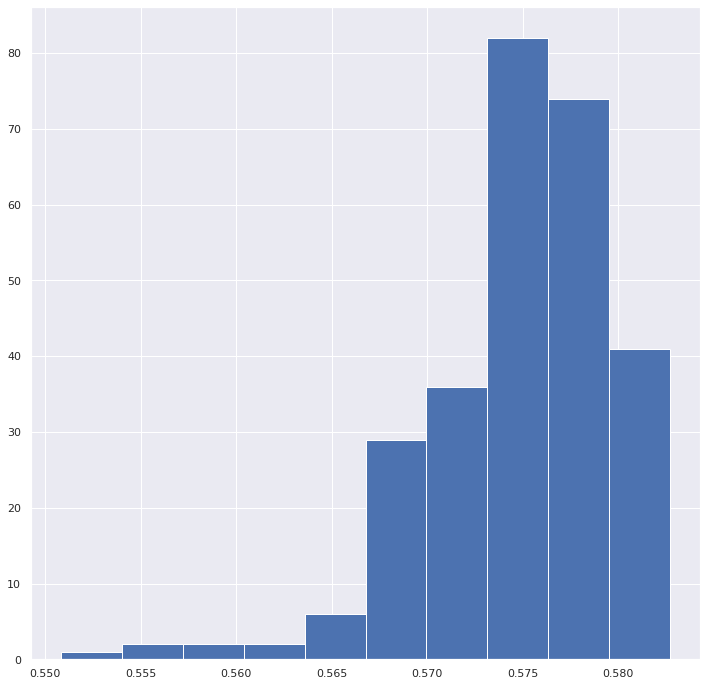

Time search : 586.3559133019999
Epoch : 0
0:	learn: 0.6635625	test: 0.6619144	best: 0.6619144 (0)	total: 3.3ms	remaining: 291ms
1:	learn: 0.6408023	test: 0.6413327	best: 0.6413327 (1)	total: 6.76ms	remaining: 294ms
2:	learn: 0.6178998	test: 0.6167891	best: 0.6167891 (2)	total: 9.01ms	remaining: 258ms
3:	learn: 0.6039608	test: 0.6046785	best: 0.6046785 (3)	total: 12.4ms	remaining: 264ms
4:	learn: 0.5873698	test: 0.5866295	best: 0.5866295 (4)	total: 15.6ms	remaining: 263ms
5:	learn: 0.5743815	test: 0.5721845	best: 0.5721845 (5)	total: 18.1ms	remaining: 250ms
6:	learn: 0.5627336	test: 0.5599555	best: 0.5599555 (6)	total: 21.6ms	remaining: 253ms
7:	learn: 0.5564766	test: 0.5542989	best: 0.5542989 (7)	total: 25.4ms	remaining: 258ms
8:	learn: 0.5479184	test: 0.5443074	best: 0.5443074 (8)	total: 29.5ms	remaining: 262ms
9:	learn: 0.5400132	test: 0.5355154	best: 0.5355154 (9)	total: 32.8ms	remaining: 259ms
10:	learn: 0.5348980	test: 0.5305185	best: 0.5305185 (10)	total: 37ms	remaining: 262ms
11

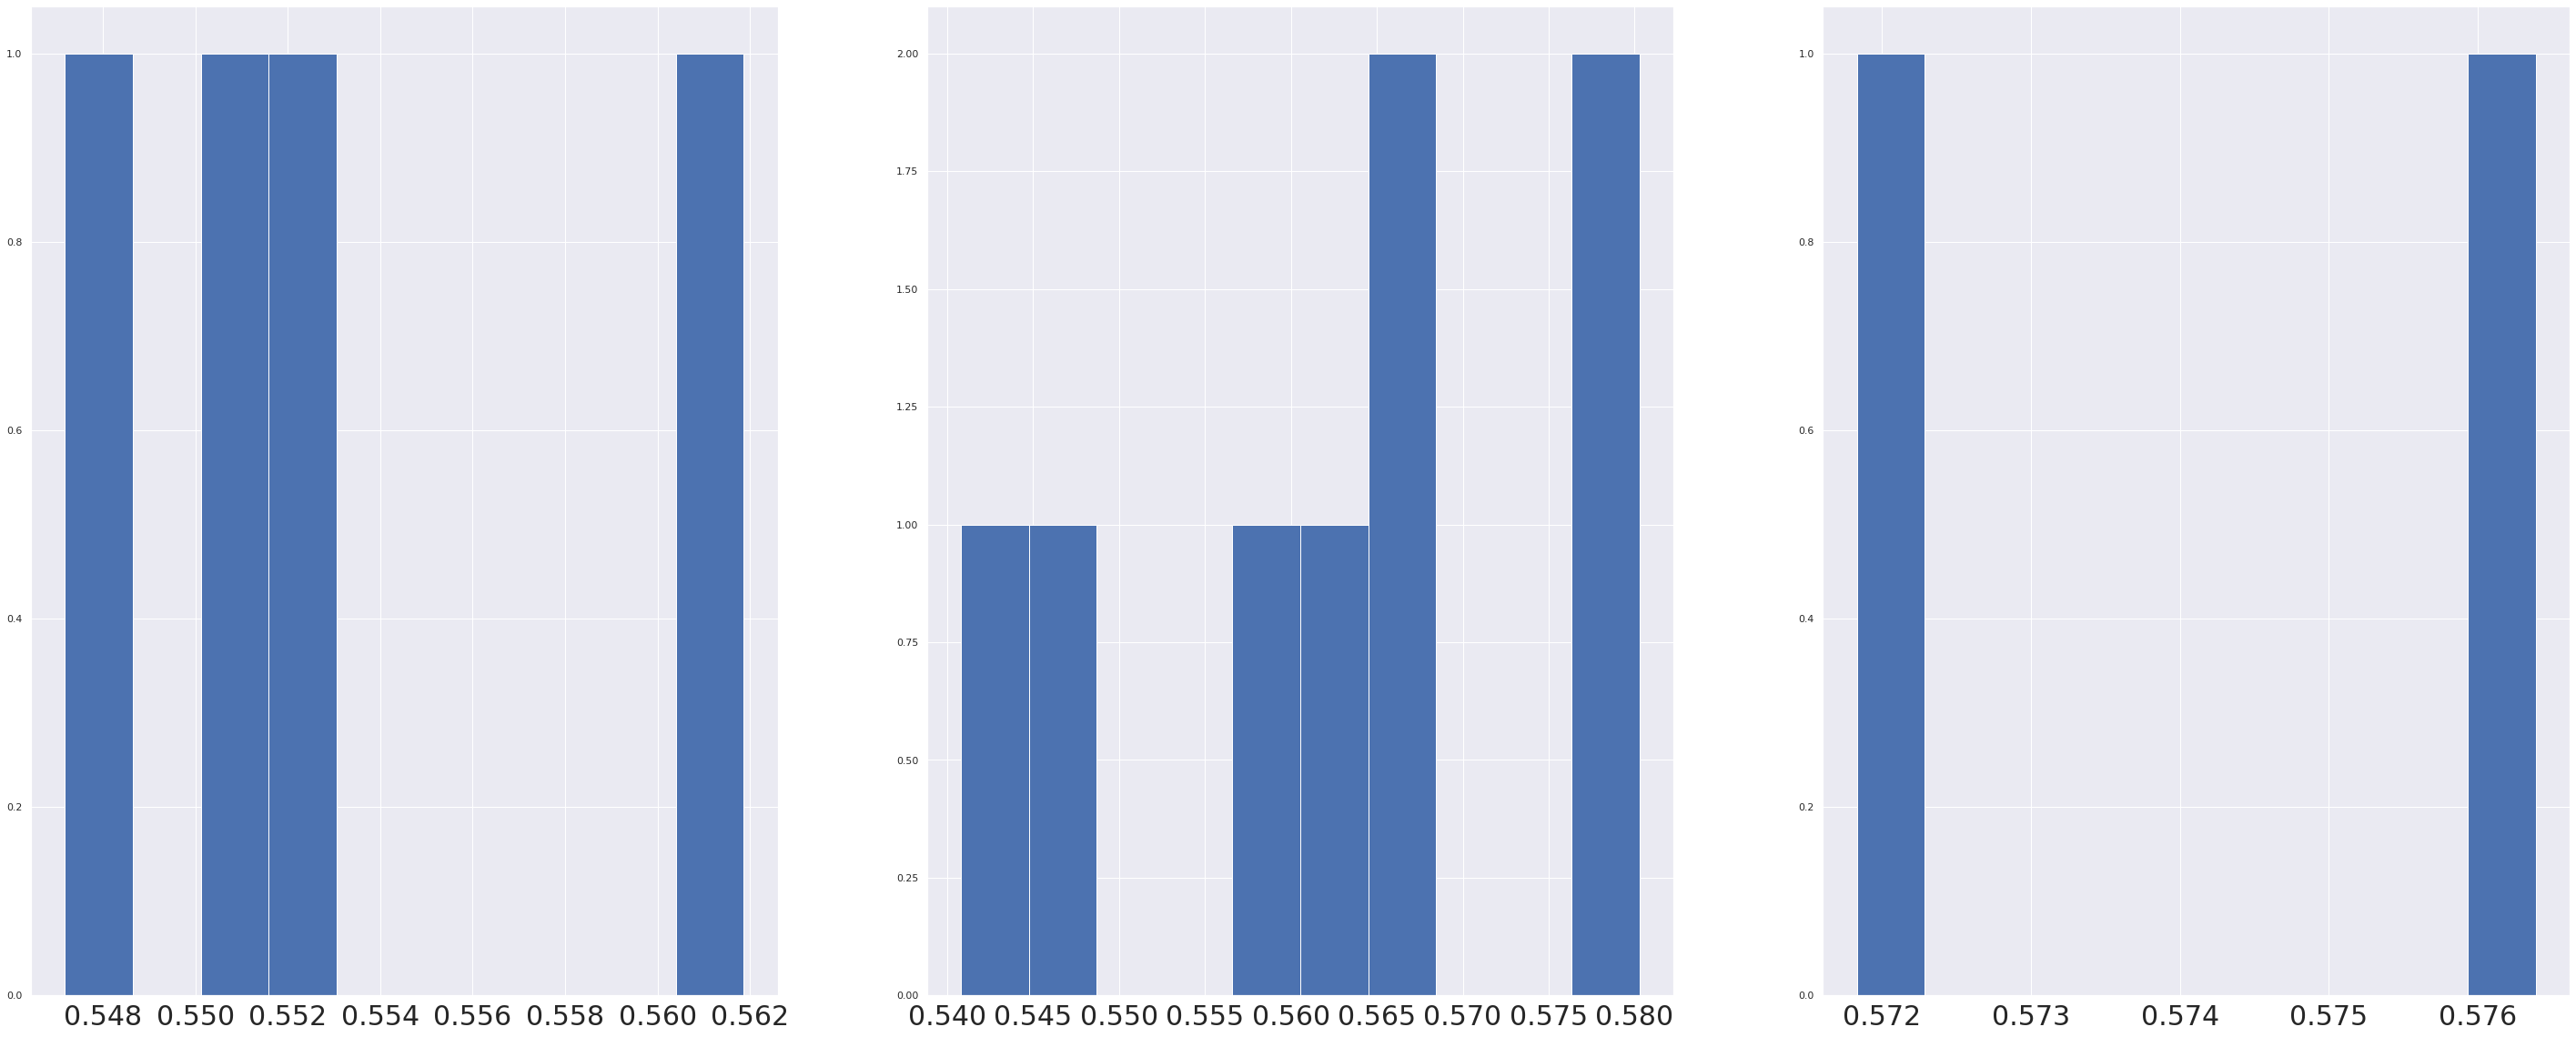

Time search : 636.5574911799999
Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.6634 - accuracy: 0.6548 - val_loss: 0.4793 - val_accuracy: 0.8031
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.7330 - val_loss: 0.5882 - val_accuracy: 0.6750
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7028 - val_loss: 0.4573 - val_accuracy: 0.8025
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7233 - val_loss: 0.4738 - val_accuracy: 0.7656
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7104 - val_loss: 0.4966 - val_accuracy: 0.7962
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7368 - val_loss: 0.4955 - val_accuracy: 0.7575

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 7/50
400/400 [===============

In [11]:
bml.train()

# Ensemble

In [12]:
bml.ensemble()


Stacking Model : 


Cross validation score :

roc_auc = 0.827
precision 1 = 0.7201
recall 1 = 0.4215
f1 score 1 = 0.5317

              precision    recall  f1-score   support

           0      0.866     0.958     0.910      6370
           1      0.720     0.421     0.532      1630

    accuracy                          0.849      8000
   macro avg      0.793     0.690     0.721      8000
weighted avg      0.836     0.849     0.833      8000


Blend Model : 


Cross validation score :

roc_auc = 0.8466
precision 1 = 0.5525
recall 1 = 0.6491
f1 score 1 = 0.5969

              precision    recall  f1-score   support

           0      0.906     0.865     0.885      6370
           1      0.552     0.649     0.597      1630

    accuracy                          0.821      8000
   macro avg      0.729     0.757     0.741      8000
weighted avg      0.834     0.821     0.827      8000



# Leaderboard (Validation score)

In [13]:
leaderboard_val = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='val')
print('\nValidation Leaderboard (threshold = 0.5)')
leaderboard_val.to_csv('./results/results_tabular/leaderboard_val.csv', index=False)
leaderboard_val


Validation Leaderboard (threshold = 0.5)


,name,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
7,BlendModel,0.8214,0.6491,0.5525,0.5969,0.8466
1,Random_Forest,0.8200,0.6472,0.5495,0.5944,0.8435
4,CatBoost,0.7901,0.7178,0.4897,0.5822,0.8484
5,SimpleNeuralNetwork,0.8009,0.6798,0.5085,0.5818,0.8341
2,LightGBM,0.7864,0.7123,0.4835,0.5760,0.8391
3,XGBoost,0.8558,0.4405,0.7479,0.5544,0.8443
6,Stacking,0.8488,0.4215,0.7201,0.5317,0.8270
0,Logistic_Regression,0.6970,0.6681,0.3664,0.4733,0.7531


In [14]:
leaderboard_thr_val = bml.get_leaderboard_threshold(list_threshold_1=list_threshold_1, sort_by=sort_leaderboard)
print('\nValidation Leaderboard (different thresholds)')
leaderboard_thr_val.to_csv('./results/results_tabular/leaderboard_thr_val.csv', index=False)
leaderboard_thr_val


Validation Leaderboard (different thresholds)


,name,thr_1,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
23,BlendModel,0.55,0.8372,0.5963,0.6015,0.5989,0.8466
15,BlendModel,0.50,0.8214,0.6491,0.5525,0.5969,0.8466
17,Random_Forest,0.55,0.8344,0.5975,0.5928,0.5952,0.8435
9,Random_Forest,0.50,0.8200,0.6472,0.5495,0.5944,0.8435
18,LightGBM,0.55,0.8125,0.6681,0.5317,0.5922,0.8391
20,CatBoost,0.55,0.8089,0.6798,0.5239,0.5917,0.8484
7,BlendModel,0.45,0.7991,0.6994,0.5051,0.5866,0.8466
21,SimpleNeuralNetwork,0.55,0.8208,0.6153,0.5541,0.5831,0.8341
12,CatBoost,0.50,0.7901,0.7178,0.4897,0.5822,0.8484
13,SimpleNeuralNetwork,0.50,0.8009,0.6798,0.5085,0.5818,0.8341


In [15]:
df_oof_val = bml.Y_train
for name in bml.models.keys():
    df_oof_val[name] = bml.models[name].info_scores['oof_val']
df_oof_val

,Exited,Logistic_Regression,Random_Forest,LightGBM,XGBoost,CatBoost,SimpleNeuralNetwork,Stacking,BlendModel
522,0,0.310591,0.177408,0.146524,0.052925,0.143964,0.186496,0.00,0.169651
5667,0,0.185148,0.059426,0.063750,0.013046,0.053360,0.116719,0.00,0.081908
4030,0,0.312334,0.483103,0.449301,0.249693,0.574807,0.489253,0.33,0.426415
3198,0,0.308673,0.266930,0.197857,0.094624,0.328143,0.243689,0.05,0.239986
2902,0,0.304060,0.279746,0.269387,0.094562,0.234174,0.350183,0.12,0.255352
...,...,...,...,...,...,...,...,...,...
9067,0,0.544213,0.328533,0.152878,0.059638,0.206452,0.223048,0.04,0.252460
9617,0,0.505282,0.214436,0.255588,0.056433,0.234180,0.274758,0.02,0.256780
5152,0,0.211643,0.086821,0.137614,0.027396,0.066913,0.044425,0.01,0.095802
3322,0,0.369506,0.393949,0.436521,0.169275,0.471890,0.433305,0.07,0.379074


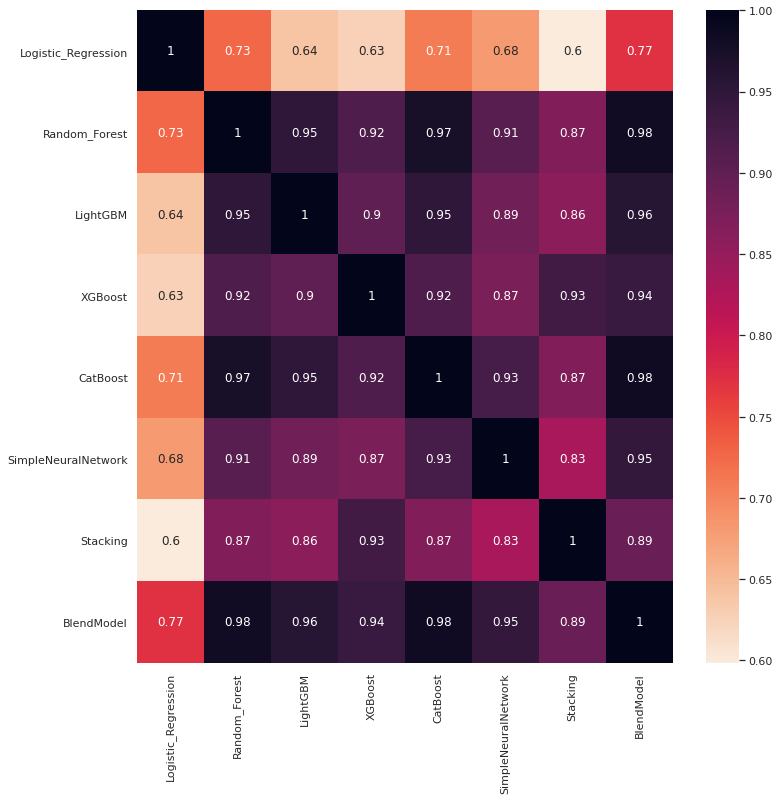

In [16]:
# correlation between oof_val predictions
bml.correlation_models()

In [17]:
df_all_results = bml.get_df_all_results()
df_all_results.to_csv('./results/results_tabular/df_all_results.csv', index=False)
df_all_results

,mean_fit_time,params,mean_test_score,std_test_score,model
0,0.029898,"{'C': 0.22385819685797081, 'penalty': 'l1'}",0.475210,0.004852,Logistic_Regression
1,0.028356,"{'C': 0.2218446528304022, 'penalty': 'l1'}",0.475210,0.004852,Logistic_Regression
2,0.028314,"{'C': 0.21676561456877647, 'penalty': 'l1'}",0.475210,0.004852,Logistic_Regression
3,0.027362,"{'C': 0.21762602097115671, 'penalty': 'l1'}",0.475210,0.004852,Logistic_Regression
4,0.031397,"{'C': 0.22195223470972608, 'penalty': 'l1'}",0.475210,0.004852,Logistic_Regression
...,...,...,...,...,...
4712,31.042729,"{'dropout_rate': 0.10885971513973508, 'hidden_...",0.552046,0.000000,SimpleNeuralNetwork
4713,31.834656,"{'dropout_rate': 0.015329446228812271, 'hidden...",0.550636,0.000000,SimpleNeuralNetwork
4714,37.397442,"{'dropout_rate': 0.2863634046452407, 'hidden_u...",0.548647,0.000000,SimpleNeuralNetwork
4715,31.857273,"{'dropout_rate': 0.2963854416348935, 'hidden_u...",0.547179,0.000000,SimpleNeuralNetwork


In [18]:
df_all_results_mean = df_all_results.groupby('model').mean().sort_values('mean_test_score', ascending=False)
print('\nGridSearch information Leaderboard')
df_all_results.to_csv('./results/results_tabular/df_all_results_mean.csv', index=False)
df_all_results_mean


GridSearch information Leaderboard


,mean_fit_time,mean_test_score,std_test_score
model,,,
CatBoost,0.418857,0.574722,0.008229
SimpleNeuralNetwork,44.707974,0.561632,0.000000
Random_Forest,0.851839,0.553889,0.012618
LightGBM,0.399491,0.541410,0.010013
XGBoost,0.552506,0.534251,0.013039
Logistic_Regression,0.027367,0.467997,0.006846


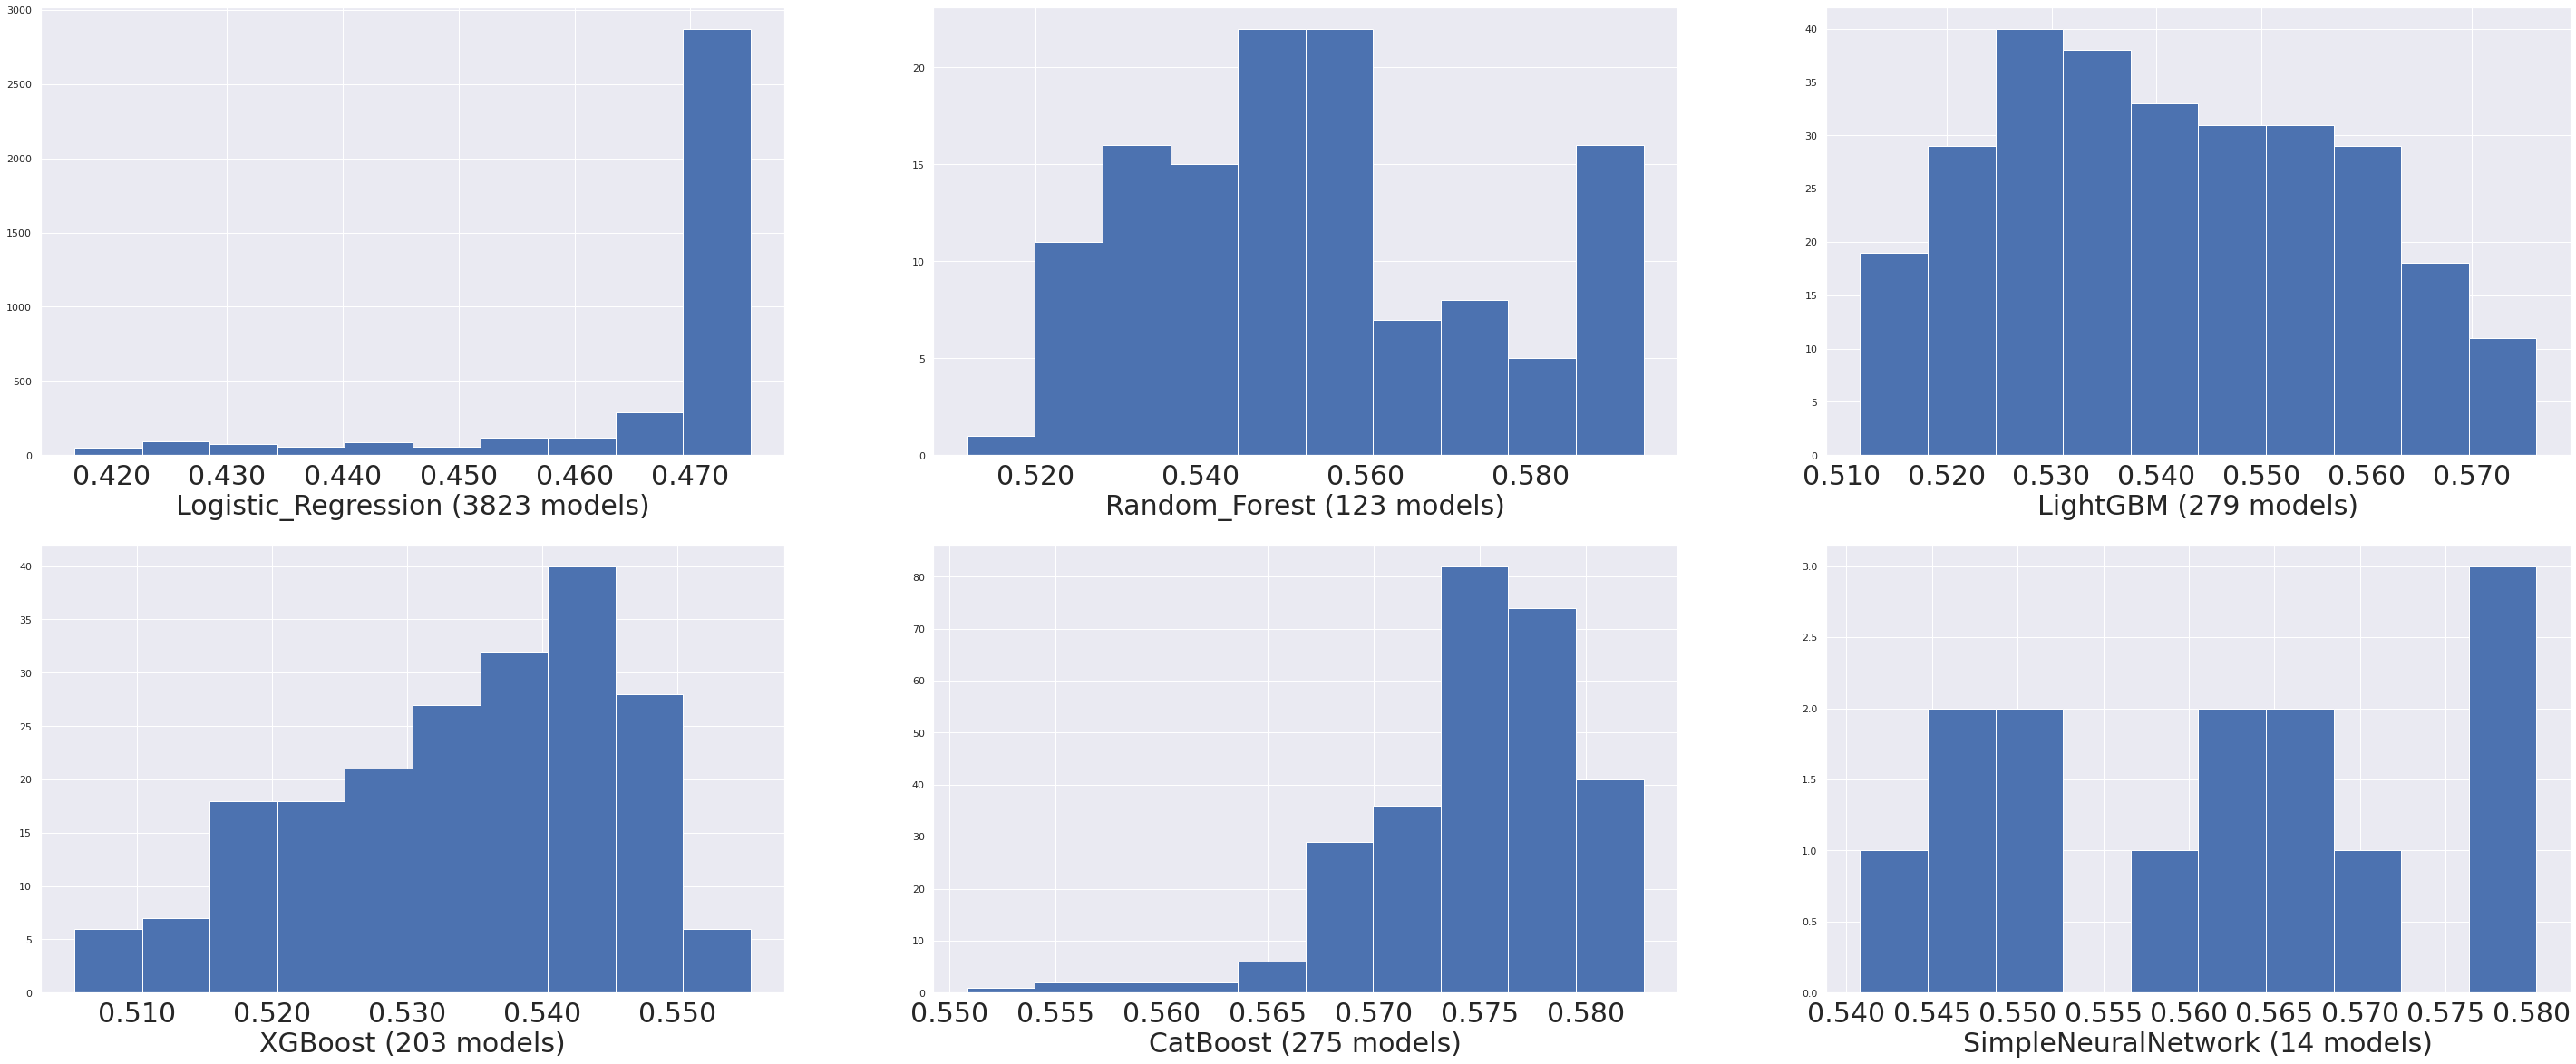

In [19]:
bml.show_distribution_scores()

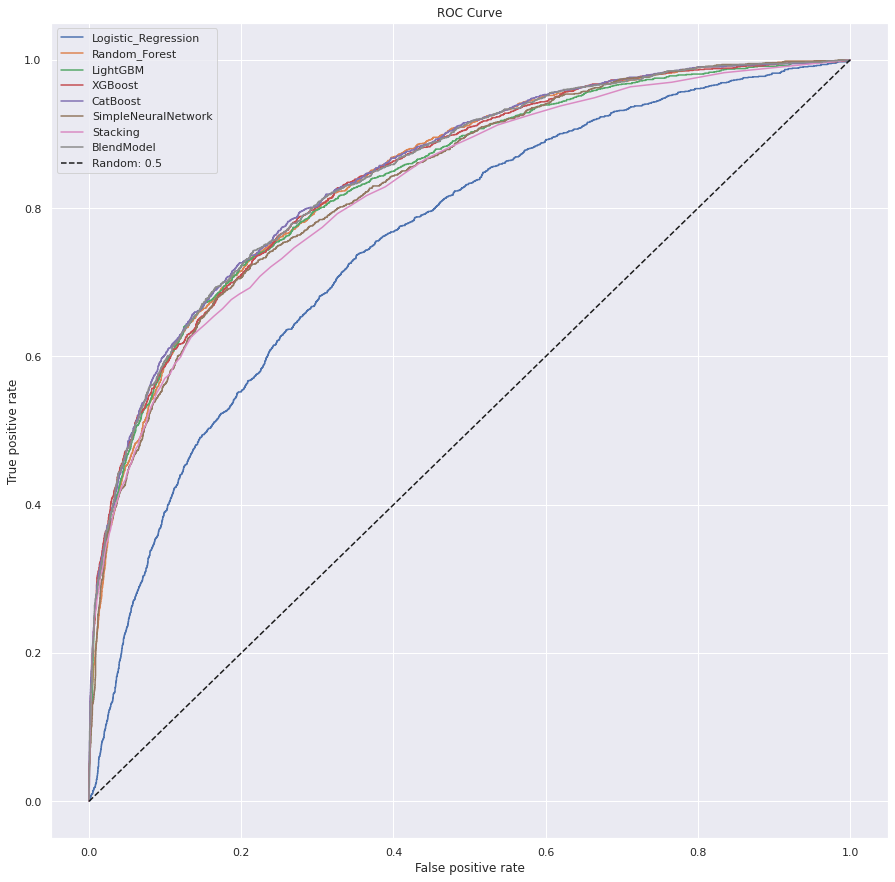

In [20]:
if bml.objective == 'binary_proba':
        bml.get_roc_curves()

# Testing

In [21]:
on_test_data = True
bml.leader_predict(on_test_data, thr_1=thr_1_test) # or bml.leader_predict(aml.X_test, aml.Y_test)

In [22]:
leaderboard_test = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='test')
print('\nTest Leaderboard (threshold = '+str(thr_1_test)+')')
leaderboard_test.to_csv('./results/results_tabular/leaderboard_test.csv', index=False)
leaderboard_test


Test Leaderboard (threshold = 0.5)


,name,accuracy_test,recall_test,precision_test,f1_test,roc_auc_test
7,BlendModel,0.8525,0.5356,0.6728,0.5964,0.8354
1,Random_Forest,0.8140,0.6462,0.5356,0.5857,0.8334
4,CatBoost,0.7795,0.7248,0.4728,0.5723,0.8395
3,XGBoost,0.8610,0.4545,0.7676,0.5710,0.8387
2,LightGBM,0.7775,0.6929,0.4684,0.5590,0.8293
6,Stacking,0.8475,0.4447,0.6962,0.5427,0.8281
0,Logistic_Regression,0.6815,0.6929,0.3552,0.4696,0.7365
5,SimpleNeuralNetwork,0.7965,0.0000,0.0000,0.0000,0.5000


In [23]:
df_prediction = bml.dataframe_predictions
df_prediction

,y_true,Logistic_Regression,Random_Forest,LightGBM,XGBoost,CatBoost,SimpleNeuralNetwork,Stacking,BlendModel
0,1,0.368,0.804,0.854,0.816,0.926,0,0.86,0.628
1,0,0.367,0.091,0.091,0.026,0.084,0,0.04,0.110
2,0,0.102,0.051,0.137,0.029,0.063,0,0.04,0.064
3,1,0.462,0.451,0.530,0.243,0.560,0,0.32,0.374
4,0,0.500,0.581,0.638,0.266,0.600,0,0.39,0.431
...,...,...,...,...,...,...,...,...,...
1995,1,0.744,0.800,0.832,0.572,0.860,0,0.64,0.635
1996,0,0.284,0.099,0.162,0.044,0.111,0,0.02,0.117
1997,0,0.285,0.137,0.164,0.028,0.135,0,0.01,0.125
1998,0,0.437,0.312,0.330,0.093,0.359,0,0.08,0.255
